In [ ]:
#Gerekli kütüphaneleri ekliyoruz
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

import math
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/train.csv", low_memory=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
n_valid = 400  # same as Kaggle's test set size
n_train = len(df)-n_valid

def split_train_val(df,n):

    return df[:n].copy(), df[n:].copy()

def preprocess_data(df, n_train):

    # Split the data
    train, val = split_train_val(df, n_train)

    # Separate features and target
    X_train = train.drop('SalePrice', axis=1)
    y_train = train['SalePrice']
    X_val = val.drop('SalePrice', axis=1)
    y_val = val['SalePrice']

    return X_train, X_val, y_train, y_val

In [ ]:
X_train, X_val, y_train, y_val = preprocess_data(df, n_train)

In [ ]:
categorical_columns = X_train.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:

label_encoders = {}

for col in categorical_columns:

    label_encoders[col] = LabelEncoder()

    all_categories = pd.concat([X_train[col], X_val[col]]).unique()

    label_encoders[col].fit(all_categories)


    X_train[col] = label_encoders[col].transform(X_train[col])
    X_val[col] = label_encoders[col].transform(X_val[col])
    X_train[col].fillna(-1, inplace=True)
    X_val[col].fillna(-1, inplace=True)

In [ ]:
columns_with_missing = X_train.columns[X_train.isnull().any()]
columns_with_missing

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [ ]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns

numerical_columns

median_imputers = {}

for col in numerical_columns:

    if pd.isnull(X_train[col]).sum():
        X_train[f'{col}_na'] = X_train[col].isna().astype(int)
        X_val[f'{col}_na'] = X_val[col].isna().astype(int)

        median_imputers[col] = SimpleImputer(strategy='median')
        X_train[col] = median_imputers[col].fit_transform(X_train[[col]])


        X_val[col] = median_imputers[col].transform(X_val[[col]])

In [ ]:

all_na_columns = set(col for col in X_train.columns if col.endswith('_na'))
for col in all_na_columns:
    if col not in X_val.columns:
        X_val[col] = 0
    if col not in X_train.columns:
        X_train[col] = 0

In [ ]:
def rmse(y_actual,y_predict):
    return math.sqrt(((y_actual-y_predict)**2).mean())

In [ ]:
model_1=DecisionTreeRegressor()
model_1.fit(X_train, y_train)
model_1.score(X_train, y_train)

1.0

In [ ]:
model_2=RandomForestRegressor()
model_2.fit(X_train, y_train)
model_2.score(X_train, y_train)
# Burada traine göre performansını verir.

0.9811309609418929

In [ ]:
model_3=LinearRegression()
model_3.fit(X_train, y_train)
model_3.score(X_train, y_train)

0.8842178101434403

In [ ]:
pred_model_1=model_1.predict(X_val)

In [ ]:
pred_model_2=model_2.predict(X_val)

In [ ]:
pred_model_3=model_3.predict(X_val)

In [ ]:
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2)))

In [ ]:
rmsle_model_1 = rmsle(y_val, pred_model_1)
r2_model_1 = r2_score(y_val, pred_model_1)
mse_model_1 = mean_squared_error(y_val, pred_model_1)

In [ ]:
rmsle_model_2=rmsle(y_val,pred_model_2)
r2_model_2=r2_score(y_val,pred_model_2)
mse_model_2=mean_squared_error(y_val,pred_model_2)

In [ ]:
rmsle_model_3=rmsle(y_val,pred_model_3)
r2_model_3=r2_score(y_val,pred_model_3)
mse_model_3=mean_squared_error(y_val,pred_model_3) #validasyondaki gerçek değerim (y_val) -x_val ile tahmin yaptığım pred(x_val)

In [ ]:
df_metrics=pd.DataFrame({
    'Model':['Decision Tree','Random Forest','Linear Regression'],
    'RMSLE':[rmsle_model_1,rmsle_model_2,rmsle_model_3],
    'R^2':[r2_model_1,r2_model_2,r2_model_3],
    'MSE':[mse_model_1,mse_model_2,mse_model_3]
})

print(df_metrics)

               Model     RMSLE       R^2           MSE
0      Decision Tree  0.209156  0.667462  1.956137e+09
1      Random Forest  0.146126  0.840398  9.388514e+08
2  Linear Regression  0.175591  0.683472  1.861960e+09


*Random Forest
Güçlü yönleri:Aralarındaki en iyi performansa sahip model Random Foresttir. Overfittingi azaltmıştır.
Zayıf Yönleri:Çoklu ağaçlardan oluştuğu için eğitim ve tahmin süresi daha uzundur.

Decision Tree
Güçlü yönleri: Küçük ve orta boyutlu veri setlerinde karar ağaçları hızlı bir şekilde eğitilebilir.
Zayıf yönleri:overfittinge çok yatkındır.R² değeri (0.5857) diğer modellere göre daha düşüktür.

Linear Regression
Güçlü yönleri: büyük veri setlerinde en hafif ve en hızlı çalışan modeldir.
Zayıf yönleri:MSE (1.86e+09) diğer modellere kıyasla daha yüksek olduğundan daha yüksek hata oranına sahiptir.*


In [ ]:
# 5 katlı çapraz doğrulama
cv_scores = cross_val_score(model_2, X_val, y_val, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f'Cross-Validation RMSLE scores: {cv_rmse}')
print(f'Mean CV RMSLE: {cv_rmse.mean()}')

Cross-Validation RMSLE scores: [22965.87345663 63421.11141526 49977.807189   36407.184288
 22644.32137512]
Mean CV RMSLE: 39083.25954480201


# *Özellik Mühendisliği*

Ferahlık Adı altında bir özellik oluşturalım.

In [ ]:
df['Ferahlık'] = df['GrLivArea'] + df['TotRmsAbvGrd']

# GrLivArea: Zemin üstü (zemin) yaşam alanı metrekare (Metrekare bilgisi)
#TotRmsAbvGrd: Sınıfın üzerindeki toplam oda (banyolar hariç)


In [ ]:
df['Ferahlık'].head()

,Ferahlık
0,1718
1,1268
2,1792
3,1724
4,2207


In [ ]:
df[['GrLivArea', 'TotRmsAbvGrd', 'Ferahlık']].head()

,GrLivArea,TotRmsAbvGrd,Ferahlık
0,1710,8,1718
1,1262,6,1268
2,1786,6,1792
3,1717,7,1724
4,2198,9,2207


 *Bir yaşam alanı olarak evin ailelere ne kadar konfor sunabileceği, kaç odalı olduğu, bu odaların ne kadar genişlikte olduğu, eşyaların eve ne şekilde yerleştirilebileceği ve kişisel alanın ne ölçüde sağlanabileceği önemli konulardır.*

Bina yaşı olarak bir özellik oluşturalım.


In [ ]:
df['Age'] = df['YrSold'] - df['YearBuilt']
#YrSold: Year Sold(Satıldığı Yıl)
#YearBuilt: Original construction date(Yapım Yılı)

In [ ]:
df['Age'].head(10)

,Age
0,5
1,31
2,7
3,91
4,8
5,16
6,3
7,36
8,77
9,69


*Bina yaşı, deprem yönetmeliği ve bina güvenliği açısından önemli bir faktördür. Aynı zamanda bir gayrimenkulün değerini ve yatırım getirisini belirleyen bir etkendir.*

# Hiperparametre Ayarı


In [ ]:
df["SalePrice"]=np.log(df["SalePrice"])

In [ ]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [ ]:
def print_score(m):

    print(f"RMSE of train set {rmse(model_2.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(model_2.predict(X_val), y_val)}")
    print(f"R^2 of train set {model_2.score(X_train, y_train)}")
    print(f"R^2 of validation set {model_2.score(X_val, y_val)}")

In [ ]:
model_2 = RandomForestRegressor(n_estimators=40, n_jobs=-1)
model_2.fit(X_train, y_train)
print_score(model_2)

RMSE of train set 11957.554900242265
RMSE of validation set 31128.47319651159
R^2 of train set 0.9778685428328091
R^2 of validation set 0.8352759009793518


In [ ]:
model_2 = RandomForestRegressor(n_estimators=400, min_samples_leaf=3, n_jobs=-1)
%time model_2.fit(X_train, y_train)
print_score(model_2)

CPU times: user 8.83 s, sys: 62.1 ms, total: 8.9 s
Wall time: 6.94 s
RMSE of train set 16002.914146555906
RMSE of validation set 32685.8953610723
R^2 of train set 0.960360935803662
R^2 of validation set 0.8183805846015725


In [ ]:
model_2 = RandomForestRegressor(n_estimators=150, min_samples_leaf=2, n_jobs=-1)
%time model_2.fit(X_train, y_train)
print_score(model_2)

CPU times: user 3.84 s, sys: 18.8 ms, total: 3.86 s
Wall time: 2.07 s
RMSE of train set 13767.97087677223
RMSE of validation set 31966.905464457817
R^2 of train set 0.9706596615164094
R^2 of validation set 0.8262828503867943


 *En iyi sonuç veren Random Forest modelimizde hiperparametre ayarı yaptığımızda çok fazla bir değişiklik olmadığını gözlemlemekteyiz.

Kullandığımız parametreler

n_estimators:Modelde kullanacağımız ağaç sayımızı belirledik.

max_features:Random olarak gösterilecek features sayısı

min_samples_leaf*

# Model Yorumlama


In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [ ]:
feature_importance = rf_feat_importance(model_2, df);

In [ ]:
feature_importance[:10]

,columns,importance
17,OverallQual,0.598496
46,GrLivArea,0.112219
38,TotalBsmtSF,0.037865
34,BsmtFinSF1,0.028766
43,1stFlrSF,0.022913
62,GarageArea,0.016895
44,2ndFlrSF,0.015700
4,LotArea,0.015151
54,TotRmsAbvGrd,0.013720
61,GarageCars,0.012785


 *
Günümüzde bir ev alırken en çok dikkat edilen özellik evin m2'si ve evin genişliğidir. Aynı zamanda bina dayanıklılığı açısından malzeme kalitesi de önemlidir. Malzemenin kalitesi evin doğal afetlere karşı korunmasında,kaliteli kaplama ise ses ve ısı yalıtımının yapılmasında önemli rol oynar.Böylece iç mekân daha konforlu ve enerji verimli olur.
Genel olarak en önemli özellikler bunlardır.

Sırasıyla en önemli özellikler:

Genel Kalite: Genel malzeme ve kaplama kalitesi

GrLivArea: Zemin üstü yaşam alanı metrekare

TotalBsmtSF: Bodrum alanının toplam metrekaresi

1stFlrSF: Birinci Kat metrekare

GarageArea: Garajın metrekare cinsinden boyutu

GarageCars: Araç kapasitesine göre garajın boyutu

LotArea: Metrekare cinsinden parsel büyüklüğü

Yapım Yılı: Orijinal inşaat tarihi

2ndFlrSF: İkinci katın metrekaresi*




**Feature** **İmportance** **Grafiği** **çizelim**

In [ ]:
def plot_feature_importance(fi):
    return fi.plot('columns', 'importance', 'barh', figsize=(12,7), legend=False)

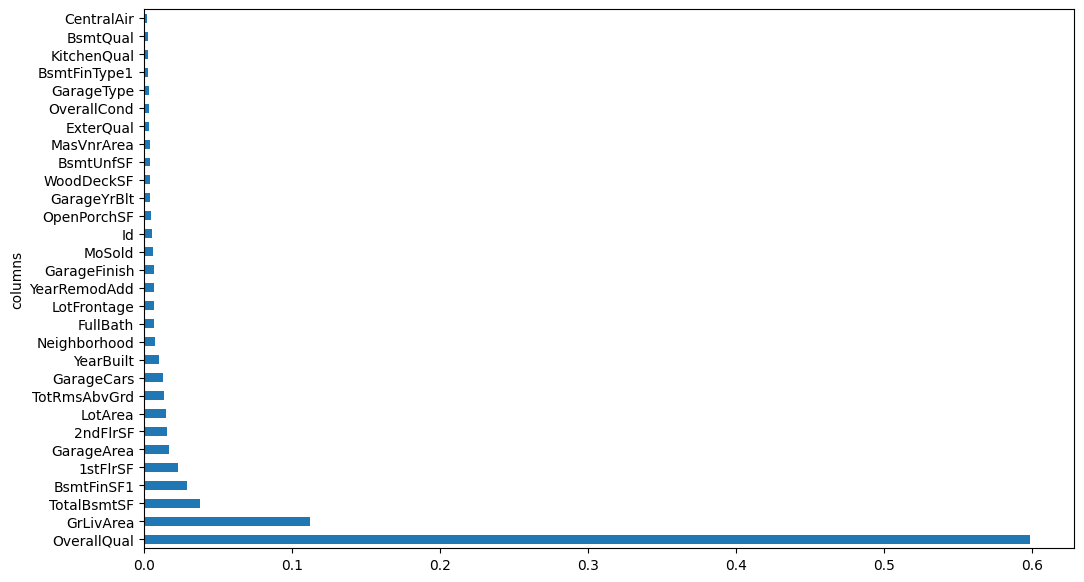

In [ ]:
plot_feature_importance(feature_importance[:30]);

*Modelimizin daha iyi performans göstermesi için bazı özellikleri atabiliriz. Hangi özelliklerin önemli olduğunu belirlemek için feature importance özelliğini kullanalım.*

In [ ]:
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"];  #  0.005'ten büyük olan önemli özellikleri tutar.
len(keep_columns)

18

In [ ]:
keep_columns

,columns
17,OverallQual
46,GrLivArea
38,TotalBsmtSF
34,BsmtFinSF1
43,1stFlrSF
62,GarageArea
44,2ndFlrSF
4,LotArea
54,TotRmsAbvGrd
61,GarageCars
